# Cryptotrending: há relação entre pesquisas por criptomoedas e seus preços?

No mercado de capitais há uma metáfora chamada de _"shoeshine boy indicator"_, ou "indicador do garoto engraxate" em português. Ela surgiu na história contada por Joseph Patrick Kennedy (o pai do presidente norte-americano JFK), que diz que conseguiu prever a crise no mercado de ações de 1929 devido a uma intuição que sentiu ao receber dicas de ações do garoto que engraxava seus sapatos. Com o passar do tempo e a popularização da história, a expressão passou a ser usada por investidores e analistas quando certas tendências de investimento se tornavam conhecidas a ponto de pessoas que não tinham familiaridade alguma com finanças começarem a se interessar por elas. Esse momento, segundo alguns, indicava que era hora de sair desse mercado, porque quando pessoas distantes dos investimentos começavam a investir, sinalizava que não havia mais quem comprar o ativo, e que uma crise (ou _"bear market"_) era iminente.

Hoje em dia há quem diga que esse indicador não funciona mais, e que certas tendências de investimentos são permanentes, mesmo que pessoas pouco familiarizadas com finanças conheçam e invistam nos ativos. Independente do "shoeshine boy indicator" ser funcional ou não, quem costuma investir ou acompanha os mercados financeiros já deve ter notado uma relação entre o preço de um ativo e sua popularidade. Mercados em alta (ou _"bull markets"_ ) atraem muitos novos investidores, e esse fenômeno social tem um impacto no quanto se fala sobre essas opções de investimento. Ou, talvez, o contrário seja verdade: a popularidade de um ativo novo atrai novos investidores, que pressionam os preços para cima. Possivelmente, acontece uma mistura dos dois efeitos. Você com certeza já ouviu falar sobre **Bitcoin**. Se for um pouco mais atento a tecnologia, deve conhecer também a rede Ethereum e sua criptomoeda **Ether**. Essas informações podem ter chegado até você por pessoas que não trabalham no mercado financeiro, ou que, até pouco tempo, não investiam em nada. Nesse mesmo período, o preço do Bitcoin disparou de pouco mais de 100 dólares em Abril de 2013 para mais de 4000 em Novembro de 2018. O que causou esse salto no preço é uma questão complexa, mas que houve uma relação entre a popularidade e o preço parece ser bem claro.

Para testar a relação entre popularidade e preços de criptoativos, vamos comparar neste projeto a variação de preço de duas das principais criptomoedas, Bitcoin (BTC) e Ether (ETH), com os volumes transacionados e com suas taxas de pesquisa do Google Trends. Se por um lado não é possível afirmar uma relação de causalidade entre essas variáveis, é interessante observar como elas se correlacionam. Para isso utilizaremos o conjunto de dados ["Cryptocurrency Market Data"](https://www.kaggle.com/datasets/jessevent/all-crypto-currencies) com dados sobre preços de abertura, fechamento, máximo, mínimo, volume e capitalização diários de criptomoedas, dispobilizado no Kaggle, cobrindo o périodo de 28/04/2013 até 01/11/2018. Os dados de pesquisa extraímos do site [Google Trends](https://trends.google.com.br/trends/) as taxas de pesquisas mensais das duas criptomoedas, o período disponibilizado é de Janeiro de 2004 até o mês atual.

## Pré-processamento dos dados

Vamos começar importando algumas bibliotecas que serão úteis em nossa análise.

In [1]:
# pandas e datetime para criação e manipulação de DataFrames
import pandas as pd
import datetime as dt

# matplotlib, seaborn e plotly para criação de diagramas e gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go

Agora vamos carregar os dados das tendências de pesquisa de Bitcoin e Ether nos DataFrames ``btc_gt`` e ``eth_gt``. É importante esclarecer que os números das taxas de pesquisa são relativos, de modo que o período com mais pesquisas ganha o valor de 100 e os outros valores são calculados em relação ao número de pesquisas desse mês.

In [2]:
# Carregando os dados das pesquisas sobre Bitcoin
btc_gt = pd.read_csv('C:/Users/atlas/documents/projetos_dados/datasets/bitcoin_trends.csv')

# Carregando os dados das pesquisas sobre Ether
eth_gt = pd.read_csv('C:/Users/atlas/documents/projetos_dados/datasets/ethereum_trends.csv')

Vejamos como ficaram nossas tabelas:

In [3]:
# As primeiras linhas de "btc_gt"
btc_gt.head()

,Categoria: Todas as categorias
Mês,Bitcoin: (Todo o mundo)
2004-01,1
2004-02,1
2004-03,1
2004-04,1


In [4]:
# As primeiras linhas de "eth_gt"
eth_gt.head()

,Categoria: Todas as categorias
Mês,Ethereum: (Todo o mundo)
2004-01,3
2004-02,3
2004-03,3
2004-04,3


Vemos que existem duas colunas nas tabelas: o índice e a coluna "Categoria: Todas as categorias". A primeira linha no entanto contém os nomes das colunas, "Mês" e o nome da criptomoeda seguido pelo local. Precisamos transformar o índice em uma coluna e renomear as colunas. Em seguida, vamos deletar a primeira linha. Por fim, vamos unir as duas tabelas em uma só.

In [5]:
# Resetando os índices das tabelas
btc_gt.reset_index(inplace=True)
eth_gt.reset_index(inplace=True)

# Renomeando as colunas
btc_gt.columns = ['mês', 'btc_trend']
eth_gt.columns = ['mês', 'eth_trend']

# Excluindo a primeira linha
btc_gt.drop(axis=0, index=0, inplace=True)
eth_gt.drop(axis=0, index=0, inplace=True)

# Unindo as tabelas
gt = btc_gt.merge(eth_gt, on='mês', how='outer')

# Imprimindo as primeiras linhas
gt.head()

,mês,btc_trend,eth_trend
0,2004-01,1,3
1,2004-02,1,3
2,2004-03,1,3
3,2004-04,1,3
4,2004-05,1,3


Agora vamos conferir as informações sobre a tabela resultante.

In [6]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 0 to 226
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   mês        227 non-null    object
 1   btc_trend  227 non-null    object
 2   eth_trend  227 non-null    object
dtypes: object(3)
memory usage: 7.1+ KB


A coluna "mês" está formatada como string, vamos convertê-la para "datetime". As colunas com as informações sobre as tendências de pesquisa também estão como string, vamos convertê-las para números inteiros ("int"). Mas antes, vamos conferir se há algum valor irregular nessas colunas, começando pela coluna "mês".

In [7]:
gt['mês'].unique()

array(['2004-01', '2004-02', '2004-03', '2004-04', '2004-05', '2004-06',
       '2004-07', '2004-08', '2004-09', '2004-10', '2004-11', '2004-12',
       '2005-01', '2005-02', '2005-03', '2005-04', '2005-05', '2005-06',
       '2005-07', '2005-08', '2005-09', '2005-10', '2005-11', '2005-12',
       '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06',
       '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12',
       '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06',
       '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12',
       '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06',
       '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12',
       '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06',
       '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12',
       '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
       '2010-07', '2010-08', '2010-09', '2010-10', 

Tudo certo com a coluna "mês". Vamos conferir agora a coluna "btc_trend":

In [8]:
gt['btc_trend'].unique()

array(['1', '<1', '3', '8', '2', '4', '11', '12', '9', '7', '5', '6',
       '16', '14', '21', '22', '23', '44', '100', '58', '40', '24', '19',
       '15', '13', '10', '18', '77', '17', '26', '33', '67', '51', '54',
       '69', '48', '35', '38', '37', '36', '47', '34', '25', '29'],
      dtype=object)

Vemos que há um "<1" entre os valores. Significa um valor relativo menor que 1. Como não sabemos o valor exato, vamos transformar esse valor em "0", indicando que o mês teve um total de pesquisas menor que 1.

In [9]:
gt.loc[(gt['btc_trend']=='<1'), 'btc_trend'] = 0

Vejamos se há algum valor irregular na coluna "eth_trend".

In [10]:
gt['eth_trend'].unique()

array(['3', '2', '1', '4', '6', '5', '15', '31', '20', '18', '14', '23',
       '44', '43', '13', '11', '12', '8', '7', '9', '10', '16', '53',
       '60', '39', '54', '100', '45', '37', '48', '46', '55', '61', '51',
       '38', '33', '34', '25'], dtype=object)

Apenas números, podemos partir para a conversão das colunas.

In [11]:
# Convertendo as colunas
gt['mês'] = gt['mês'].astype('datetime64[ns]')
gt['btc_trend'] = gt['btc_trend'].astype('int')
gt['eth_trend'] = gt['eth_trend'].astype('int')

# Reconferindo as informações
gt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 0 to 226
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   mês        227 non-null    datetime64[ns]
 1   btc_trend  227 non-null    int32         
 2   eth_trend  227 non-null    int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 5.3 KB


E vamos ver como ficaram as primeiras linhas:

In [12]:
gt.head()

,mês,btc_trend,eth_trend
0,2004-01-01,1,3
1,2004-02-01,1,3
2,2004-03-01,1,3
3,2004-04-01,1,3
4,2004-05-01,1,3


Parece que não temos mais problemas por aqui. Vamos carregar agora os dados sobre as transações com criptomoedas.

In [13]:
# Carregando os dados
tsc = pd.read_csv('C:/Users/atlas/documents/projetos_dados/datasets/crypto-markets.csv')

# Vendo as primeiras linhas da tabela
tsc.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


Vamos ver as informações da tabela para saber se há valores ausentes ou algum irregularidde nos dados.

In [14]:
tsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942297 entries, 0 to 942296
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   slug         942297 non-null  object 
 1   symbol       942297 non-null  object 
 2   name         942297 non-null  object 
 3   date         942297 non-null  object 
 4   ranknow      942297 non-null  int64  
 5   open         942297 non-null  float64
 6   high         942297 non-null  float64
 7   low          942297 non-null  float64
 8   close        942297 non-null  float64
 9   volume       942297 non-null  float64
 10  market       942297 non-null  float64
 11  close_ratio  942297 non-null  float64
 12  spread       942297 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 93.5+ MB


Não há valores ausentes em nossa tabela, mas a coluna "date" que contém a data das cotações está formatada como string. Vamos convertê-la e também criar uma coluna com o mês de cada negociação.

In [15]:
# Convertendo a coluna
tsc['date'] = tsc['date'].astype('datetime64[ns]')

# Criando a coluna "mês"
tsc['mês'] = tsc['date'].astype('datetime64[M]')

# Conferindo as informações
tsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942297 entries, 0 to 942296
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   slug         942297 non-null  object        
 1   symbol       942297 non-null  object        
 2   name         942297 non-null  object        
 3   date         942297 non-null  datetime64[ns]
 4   ranknow      942297 non-null  int64         
 5   open         942297 non-null  float64       
 6   high         942297 non-null  float64       
 7   low          942297 non-null  float64       
 8   close        942297 non-null  float64       
 9   volume       942297 non-null  float64       
 10  market       942297 non-null  float64       
 11  close_ratio  942297 non-null  float64       
 12  spread       942297 non-null  float64       
 13  mês          942297 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(8), int64(1), object(3)
memory usage: 100.6+ MB


Os formatos estão corretos agora, podemos começar nossa análise exploratória.

In [16]:
# Criando a fatia
btc_eth = tsc[(tsc['symbol']=='BTC') | (tsc['symbol']=='ETH')]

# Conferindo as informações
btc_eth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3253 entries, 0 to 5196
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   slug         3253 non-null   object        
 1   symbol       3253 non-null   object        
 2   name         3253 non-null   object        
 3   date         3253 non-null   datetime64[ns]
 4   ranknow      3253 non-null   int64         
 5   open         3253 non-null   float64       
 6   high         3253 non-null   float64       
 7   low          3253 non-null   float64       
 8   close        3253 non-null   float64       
 9   volume       3253 non-null   float64       
 10  market       3253 non-null   float64       
 11  close_ratio  3253 non-null   float64       
 12  spread       3253 non-null   float64       
 13  mês          3253 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(8), int64(1), object(3)
memory usage: 381.2+ KB


## Análise exploratória de dados (EDA)

Vamos iniciar nossa análise investigando o volume de Bitcoin e Ether em relação a todas os tokens em nosso dataset. Primeiro, vejamos em ordem quais as moedas mais negociadas do nosso conjunto:

In [17]:
tsc.groupby('symbol').agg({'volume':'sum'}).sort_values(by='volume', ascending=False).head()

,volume
symbol,
BTC,2.961191e+12
USDT,1.058689e+12
ETH,1.034702e+12
XRP,3.851715e+11
BCH,3.733380e+11


Temos Bitcoin disparado em primeiro lugar, seguido por Tether (USDT), uma _stablecoin_ que acompanha o valor do dólar e que é usada em diversas transações. Em seguida, com volume bem próximo, temos o Ether. As moedas seguintes tem volumes bem menos expressivos.

Vamos analisar o volume total do Bitcoin e o percentual do total ao qual ele corresponde.

In [18]:
print('Volume total de Bitcoin negociado no período:', sum(tsc[(tsc['symbol']=='BTC')]['volume']))
print()
print('Percentual do volume de Bitcoin em relação ao volume total negociado: {0:.2f}%'.
      format(((sum(tsc[(tsc['symbol']=='BTC')]['volume'])/(sum(tsc['volume']))) *100 )))

Volume total de Bitcoin negociado no período: 2961191204703.0

Percentual do volume de Bitcoin em relação ao volume total negociado: 36.04%


Mais de 36% do volume total negociado no período, entre as mais de 1500 moedas do nosso conjunto de dados, corresponde apenas as negociações de Bitcoin. Vamos conferir a mesma informação para Ether agora.

In [19]:
print('Volume total de Ether negociado no período:', sum(tsc[(tsc['symbol']=='ETH')]['volume']))
print()
print('Percentual do volume de Ether em relação ao volume total negociado: {0:.2f}%'.
      format(((sum(tsc[(tsc['symbol']=='ETH')]['volume'])/(sum(tsc['volume']))) *100 )))

Volume total de Ether negociado no período: 1034702453425.0

Percentual do volume de Ether em relação ao volume total negociado: 12.59%


O Ether é responsável por 12,59% das negociações do período. Somados, temos quase metade de todo mercado de criptomoedas do nosso conjunto de dados. Isso demonstra como essas duas moedas são representativas e termômetros do mercado.

Vamos criar uma fatia dos nossos dados com as informações sobre o preço médio de fechamento e a soma do volume mensal do Bitcoin e criar dois gráficos: um com a variação do preço e outra com a variação do volume.

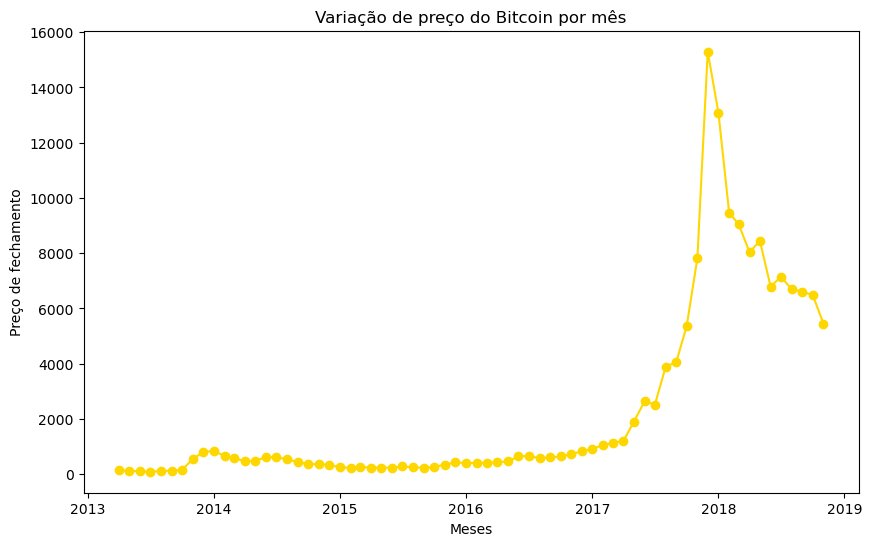

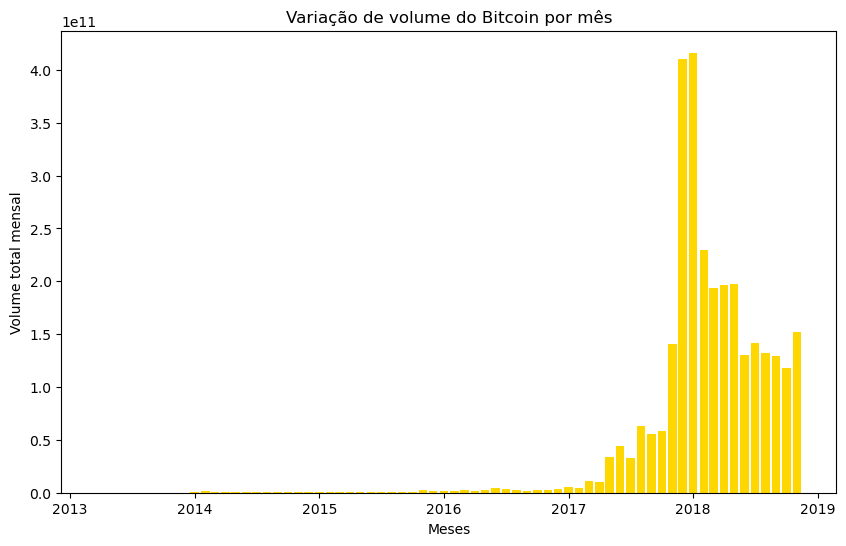

In [20]:
# Criando a tabela "btc_tsc" com os dados sobre BTC agrupadas por mês
btc_tsc = tsc[(tsc['symbol']=='BTC')].groupby('mês', as_index=False).agg({'close':'mean', 'volume':'sum'})

# Criando os dois gráficos e exibindo
plt.figure(figsize=(10,6))
plt.plot(btc_tsc['mês'], btc_tsc['close'], marker='o', color='gold')
plt.title('Variação de preço do Bitcoin por mês')
plt.ylabel('Preço de fechamento')
plt.xlabel('Meses')
plt.show()
plt.figure(figsize=(10,6))
plt.bar(btc_tsc['mês'], btc_tsc['volume'], width=25, color='gold')
plt.title('Variação de volume do Bitcoin por mês')
plt.ylabel('Volume total mensal')
plt.xlabel('Meses')
plt.show()

É visível a relação entre preço e volume, com os meses com maiores aumentos de preços coexistindo com os maiores volumes. Vamos ver se essa situação se repete com o Ether.

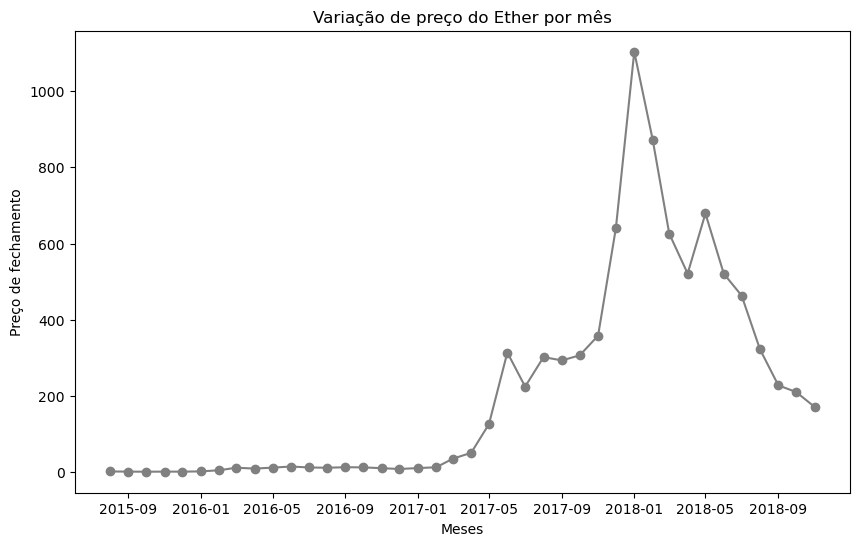

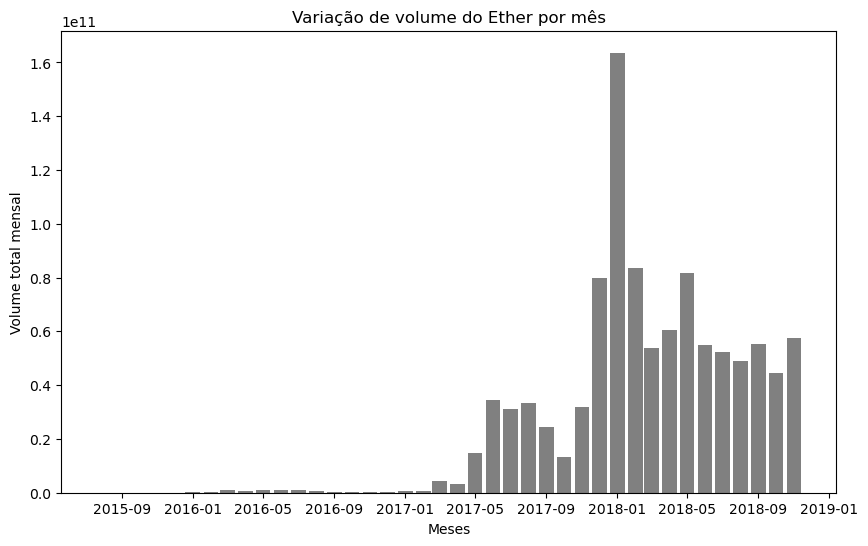

In [21]:
# Criando a tabela "btc_tsc" com os dados sobre BTC agrupadas por mês
eth_tsc = tsc[(tsc['symbol']=='ETH')].groupby('mês', as_index=False).agg({'close':'mean', 'volume':'sum'})

# Criando os dois gráficos e exibindo
plt.figure(figsize=(10,6))
plt.plot(eth_tsc['mês'], eth_tsc['close'], marker='o', color='grey')
plt.title('Variação de preço do Ether por mês')
plt.ylabel('Preço de fechamento')
plt.xlabel('Meses')
plt.show()
plt.figure(figsize=(10,6))
plt.bar(eth_tsc['mês'], eth_tsc['volume'], width=25, color='grey')
plt.title('Variação de volume do Ether por mês')
plt.ylabel('Volume total mensal')
plt.xlabel('Meses')
plt.show()

A situação se repete para o Ether. Sem dúvida, volume alto é um indicativo da popularidade da moeda, já que significa que muitas pessoas a estão negociando. Porém, nos dois casos, há uma redução dos preços depois do pico no final de 2017/início de 2018, enquanto que o volume se reduz e mantém um nível bem maior que o anterior ao ponto máximo dos preços. Isso pode refletir como as moedas ganharam entusiastas e atraiu interesse de especuladores que mantém o volume alto mesmo com queda nos preços. Dessa forma, volume ajuda a entender a variação dos preços, mas não é o único fator determinante.

Vamos passar agora para nossa análise principal: a comparação entre a variação dos preços das duas moedas e a sua taxa de pesquisa no Google. Vamos começar com o Bitcoin, montando um gráfico comparativo das duas variáveis. Primeiro, vamos ver se os nossos dois conjuntos de dados cobrem o mesmo período de tempo.

In [22]:
print('Informações sobre a distribuição dos dados sobre transações de BTC:\n', btc_tsc['mês'].describe(datetime_is_numeric=True))
print()
print('Informações sobre a distribuição dos dados sobre transações de ETH:\n', eth_tsc['mês'].describe(datetime_is_numeric=True))
print()
print('Informações sobre a distribuição dos dados sobre tendências de pesquisa:\n', gt['mês'].describe(datetime_is_numeric=True))

Informações sobre a distribuição dos dados sobre transações de BTC:
 count                               68
mean     2016-01-15 21:10:35.294117632
min                2013-04-01 00:00:00
25%                2014-08-24 06:00:00
50%                2016-01-16 12:00:00
75%                2017-06-08 12:00:00
max                2018-11-01 00:00:00
Name: mês, dtype: object

Informações sobre a distribuição dos dados sobre transações de ETH:
 count                     40
mean     2017-03-17 02:24:00
min      2015-08-01 00:00:00
25%      2016-05-24 06:00:00
50%      2017-03-16 12:00:00
75%      2018-01-08 18:00:00
max      2018-11-01 00:00:00
Name: mês, dtype: object

Informações sobre a distribuição dos dados sobre tendências de pesquisa:
 count                              227
mean     2013-06-01 03:10:18.502202624
min                2004-01-01 00:00:00
25%                2008-09-16 00:00:00
50%                2013-06-01 00:00:00
75%                2018-02-15 00:00:00
max                2022-11

Os dados sobre as transações de Bitcoin vão de 04/2013 até 11/2018, os do Ether vão de 08/2015 a 11/2018. Já os dados sobre as tendências vão de 01/2004 a 11/2022. Logo, para que nossos gráficos descrevem o mesmo período, precisamos filtrar os dados sobre pesquisas pelo período coberto pelo conjunto de dados das transações de cada moeda.

In [23]:
# Filtrando os dados para BTC
gt_btc = gt.loc[(gt['mês'] > '2013-04-01') & (gt['mês'] < '2018-11-01')].drop(columns='eth_trend', axis=1)

# Filtrando os dados para ETH
gt_eth = gt.loc[(gt['mês'] > '2015-08-01') & (gt['mês'] < '2018-11-01')].drop(columns='btc_trend', axis=1)

Agora vamos montar nosso gráfico para o Bitcoin e sua taxa de pesquisa.

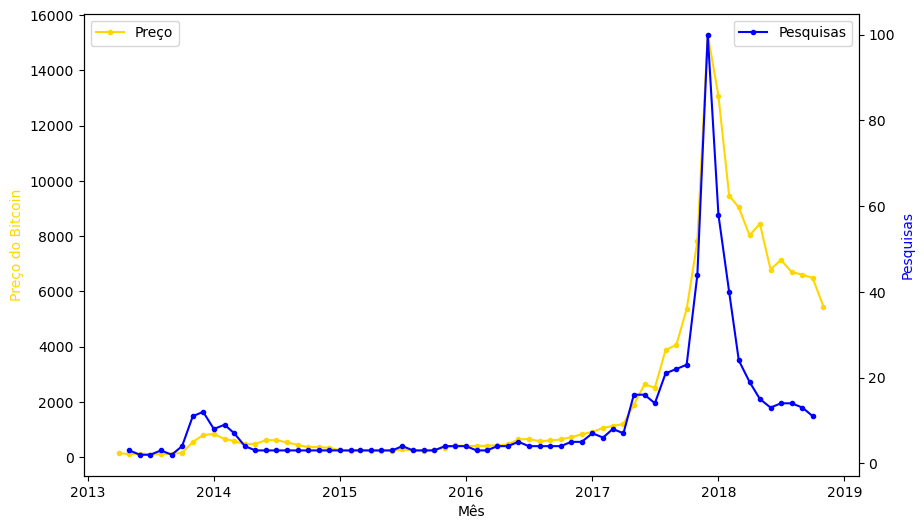

In [24]:
# Criando os objetos da figura e os eixos
btc, btc_ax = plt.subplots(figsize=(10, 6))

# Criando o gráfico para o preço
btc_ax.plot(btc_tsc['mês'],
            btc_tsc['close'],
            color = 'gold',
            marker='.',
           label='Preço')
btc_ax.legend(loc='upper left')

# Criando o título dos primeiros eixos
btc_ax.set_xlabel('Mês')
btc_ax.set_ylabel('Preço do Bitcoin', color='gold')

# Criando o segundo eixo
btc_ax2 = btc_ax.twinx()

# Criando o gráfico para as tendências e nomeando o segundo eixo
btc_ax2.plot(gt_btc['mês'],
            gt_btc['btc_trend'],
            color='blue',
            marker='.',
            label='Pesquisas')
btc_ax2.legend(loc='upper right')

btc_ax2.set_ylabel('Pesquisas', color='blue')
plt.show()

A relação entre a popularidade relativa do Bitcoin nas pesquisas e o preço da moeda parecem seguir um caminho bem similar, com os dois gráficos tendo um pico no mesmo mês. As duas variáveis se movem em proximidade ao longo do período dos dados, com a popularidade oscilando para baixo de forma mais significativa depois do pico do que os preços. A alta na popularidade pode ter sido um efeito da curiosidade das pessoas sobre a moeda que, depois de aprenderem sobre o Bitcoin, não voltaram a pesquisar depois.

Vamos ver como esse gráfico se parece para o Ether.

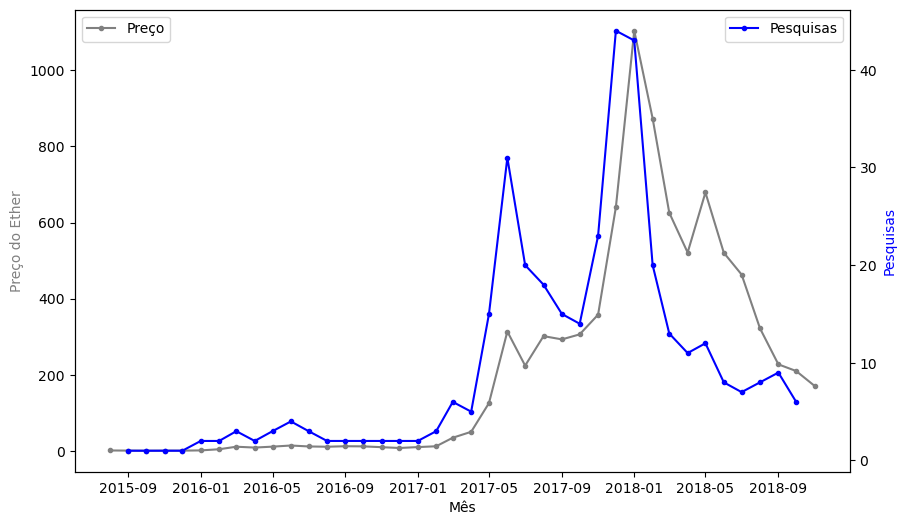

In [25]:
# Criando os objetos da figura e os eixos
eth, eth_ax = plt.subplots(figsize=(10, 6))

# Criando o gráfico para o preço
eth_ax.plot(eth_tsc['mês'],
            eth_tsc['close'],
            color = 'grey',
            marker='.',
           label='Preço')
eth_ax.legend(loc='upper left')

# Criando o título dos primeiros eixos
eth_ax.set_xlabel('Mês')
eth_ax.set_ylabel('Preço do Ether', color='grey')

# Criando o segundo eixo
eth_ax2 = eth_ax.twinx()

# Criando o gráfico para as tendências e nomeando o segundo eixo
eth_ax2.plot(gt_eth['mês'],
            gt_eth['eth_trend'],
            color='blue',
            marker='.',
            label='Pesquisas')
eth_ax2.legend(loc='upper right')

eth_ax2.set_ylabel('Pesquisas', color='blue')
plt.show()

No caso do Ether a relação é menos linear: o aumento das pesquisas e do preço ocorre em um período similar, mas a oscilação das variáveis é bem maior. A diferença na dimensão das variações também é maior que no caso do Bitcoin.

Para embasar um pouco mais nossa análise, vamos calcular o coeficiente de correlação linear entre as variáveis. Antes, vamos fundir nossas tabelas e excluir as colunas que não serão analisadas.

In [26]:
# Unindo as tabelas
tsc_gt = tsc.merge(gt, on='mês', how='left')

# Excluindo as colunas e os dados que não utilizaremos
tsc_gt = tsc_gt[['symbol', 'close', 'volume', 'mês', 'btc_trend', 'eth_trend']]
btc_corr = tsc_gt[(tsc_gt['symbol']=='BTC')]
eth_corr =  tsc_gt[(tsc_gt['symbol']=='ETH')]

Agora vamos ver a matriz de correlação do Bitcoin:

In [27]:
btc_corr.corr()

,close,volume,btc_trend,eth_trend
close,1.000000,0.941103,0.851649,0.808777
volume,0.941103,1.000000,0.831755,0.785538
btc_trend,0.851649,0.831755,1.000000,0.894879
eth_trend,0.808777,0.785538,0.894879,1.000000


Vemos que há uma forte correlação linear tanto entre o volume e o preço, quanto entre as pesquisas e o preço do BTC. O mesmo podemos afirmar entre as pesquisas e o volume. Outro fator interessante, que demonstra a relação entre as duas criptomoedas que selecionados, é o coeficiente de 0,8 para a correlação das pesquisas sobre Ether e o preço do Bitcoin.

Vejamos a matriz de correlação para o Ether agora:

In [28]:
eth_corr.corr()

,close,volume,btc_trend,eth_trend
close,1.000000,0.876529,0.721196,0.758807
volume,0.876529,1.000000,0.643372,0.689435
btc_trend,0.721196,0.643372,1.000000,0.889117
eth_trend,0.758807,0.689435,0.889117,1.000000


Aqui, como era previsto, não temos uma correlação tão forte entre o preço e as pesquisas, mas ela existe. De maneira similar, vemos como as pesquisas por Bitcoin se relacionam ao preço do Ether, e como as pesquisas se correlacionam entre si. Porém, é importante salientar, que essa correlação estimada é apenas linear, ou seja, pode existir outras formas de correlação que apontem relações ainda mais fortes entre as variáveis.

## Conclusões

Vimos como Bitcoin e Ether são responsáveis por uma fatia considerável do mercado cripto: quase 50% do volume de transações das mais de 1500 moedas do nosso conjunto de dados. Essa característica faz dessas duas moedas boas representantes desse mercado.

No périodo dos dados, o volume de transações acompanhou de perto as variações de preço, o que demonstra a relação entre a quantidade de pessoas negociando (e os montantes negociado) e as variações de preço das moedas.

Além do volume, pudemos conferir como as pesquisas no Google pelo nome da criptomoeda está correlacionada ao seu preço. Esse fenômeno se mostrou mais intenso em relação ao Bitcoin, mas o Ether não ficou tão atrás. Tanto os gráficos, como o coeficiente de correlação linear, demonstram a existência dessa relação.

Em conclusão, notamos como a popularidade dessas moedas se relaciona com seu preço e podemos confirmar a impressão que muitos investidores tem de que, quando os preços sobem, todo mundo começa a comentar sobre as moedas. Seja o preço afetado pela popularidade, a popularidade afetada pelo preço, ou se os dois variam juntos por força de alguma outra variável, não é possível afirmar no âmbito dessa análise.

### Para saber mais

* [CryptoZombies](https://cryptozombies.io/pt/course "CryptoZombies - Tutorial de Solidity e blockchain de Ethereum"): O CryptoZombies é uma plataforma de ensino interativa onde você pode aprender desde os conceitos básicos sobre blockchain e criptomoedas, até ideias avançadas sobre contratos inteligentes e NFTs.
* [If You Can: How Millennials Can Get Rich Slowly](http://efficientfrontier.com/ef/0adhoc/ifyoucan.pdf "If You Can How Millennials Can Get Rich Slowly por William J. Bernstein"): Se você se interessa por investimentos e não sabe por onde começar, esse livreto escrito pelo pesquisador estadunidense William J. Bernstein, dispobilizado gratuitamente, traz uma introdução aos principais conceitos e sugestões financeiras que você pode seguir de forma prática e segura.